In [1]:
from src.ai import generateImage, chatCompletion
from src.utils import displayB64Image, saveB64Image, extractSingleJsonString, extractSingleArray, displayText

In [2]:
prompt = """'Write an action-packed story about the given input with 5-7 distinct scenes, each one vividly bringing to life the characters and settings through descriptive language. Incorporate a mix of dialogue and narration to create a dynamic, immersive experience. Emphasize the actions and facial expressions of the characters, painting a picture with words that transports the reader to the world of the story. Use a variety of locations and scenery changes to keep the narrative engaging and unpredictable, seamlessly transitioning between scenes to maintain a sense of flow. Balance close-ups of the characters with wider shots of the environment, allowing the reader to see the bigger picture and appreciate the setting. Include moments of high visual impact and drama, where the action unfolds like a cinematic spectacle.
Do not include scene titles or other kind of metadata.
Respond with a valid JSON object, making sure to include the closing bracket. The object should only contain the key `story` with the full story as a string value.

Input: a superhero turns to a life of crime"""

completion = chatCompletion(prompt, max_tokens=1024, json=True)
story = extractSingleJsonString(completion, 'story')
# completion
displayText(story)
# TODO display TTS audio

In [3]:
prompt = """Given the following input story, Assistant's task is to extract descriptions of 4 scenes in the story to create images for.

Each scene should contextually be from the story but Assistant should expand on them to create vivid and detailed image descriptions.

Respond with a valid JSON object. The object should only contain the key `scenes` with an array of 4 strings as values.
Input Story: """
prompt = f"{prompt}\n```{story}```"
completion = chatCompletion(prompt, max_tokens=1024, json=True)
scenes = extractSingleArray(completion, 'scenes')
# completion
scenes

['A dark and gritty cityscape at dusk, with a lone figure standing atop a skyscraper, gazing out over the concrete jungle. The figure, Jack Harris, aka The Guardian, is silhouetted against the fading light, his eyes cast downward in a mixture of sadness and determination. His iconic superhero cape flows behind him, a symbol of his former life, now tattered and worn. The city below is a blur of neon lights and towering skyscrapers, a reminder of the world he once protected.',
 "A high-end jewelry store, its display cases shattered and broken, with glittering diamonds and gold scattered across the floor. Jack stands amidst the wreckage, his eyes gleaming with a mischievous spark as he stuffs handfuls of jewels into a bag. The security guards lie unconscious in the background, a testament to Jack's strength and agility. The air is thick with the smell of smoke and broken glass, and the sound of police sirens can be heard in the distance.",
 "A seedy underworld bar, its walls adorned with 

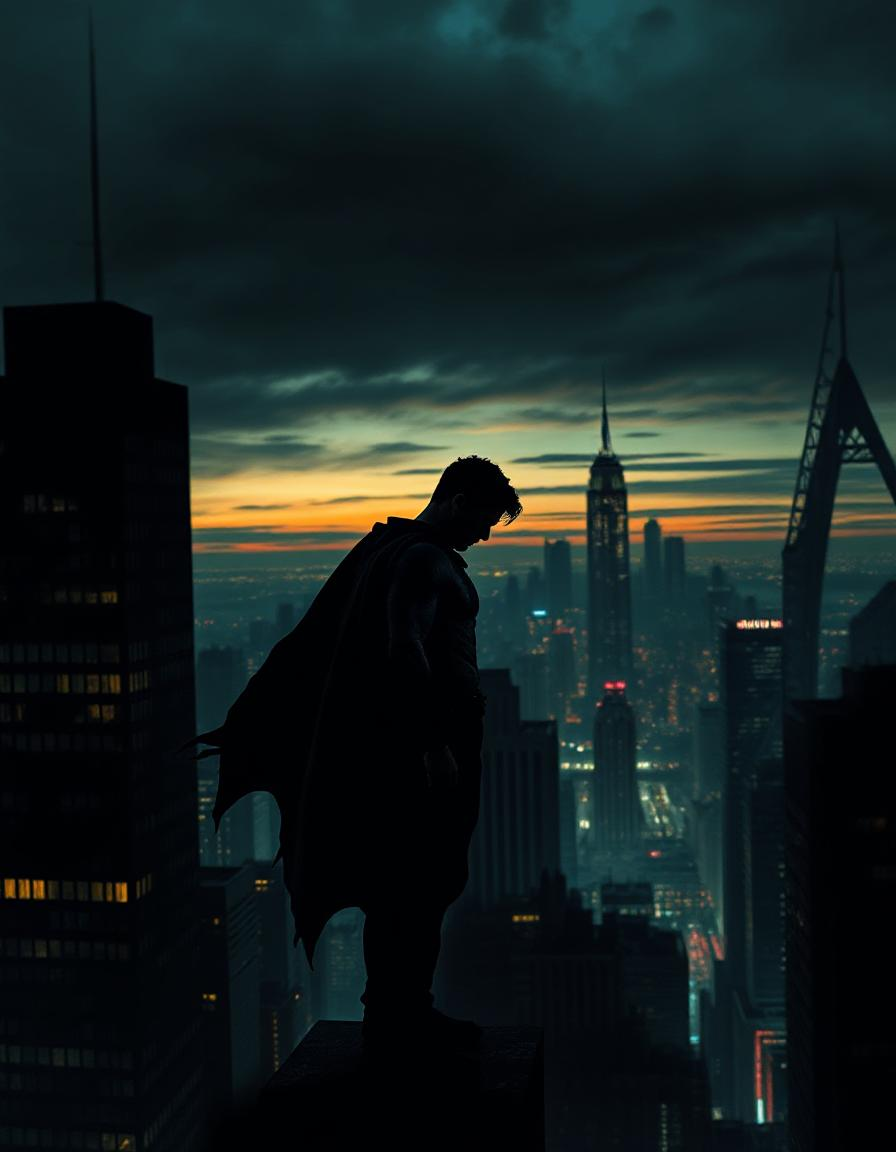

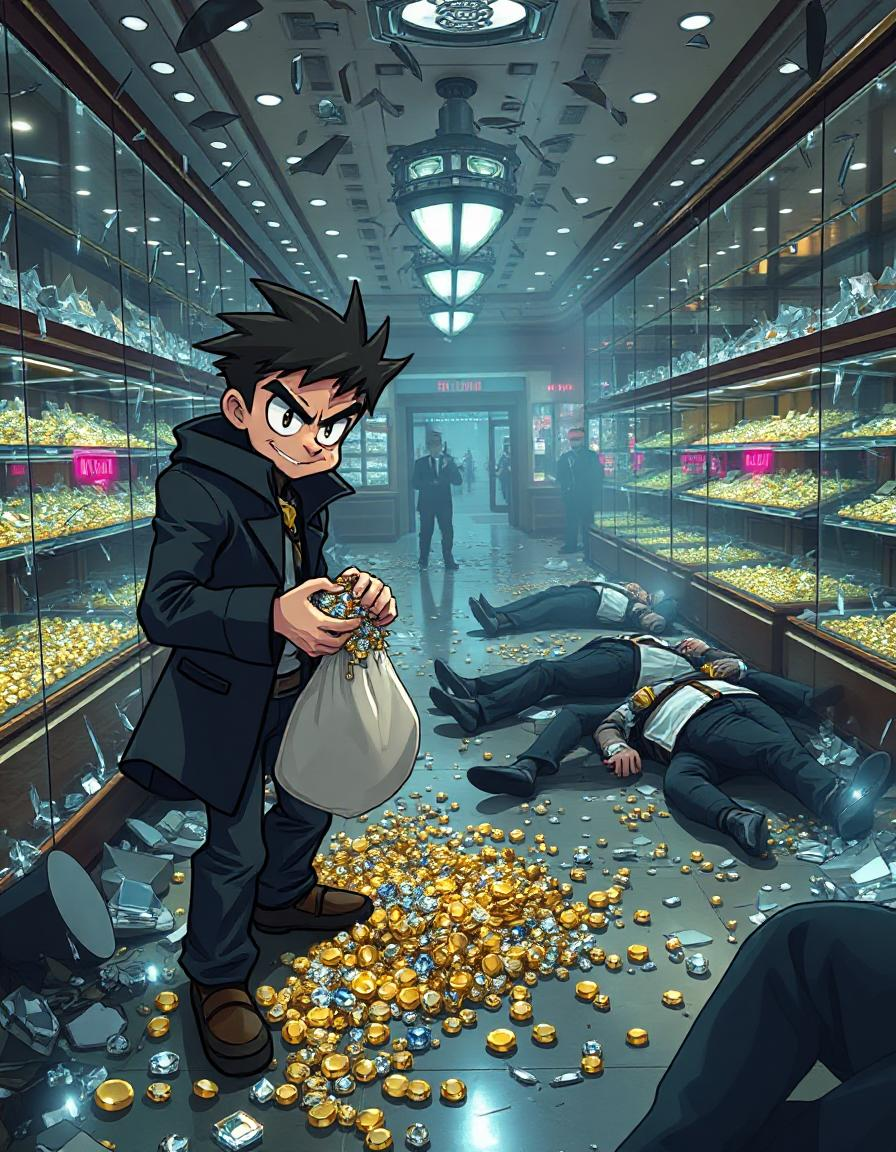

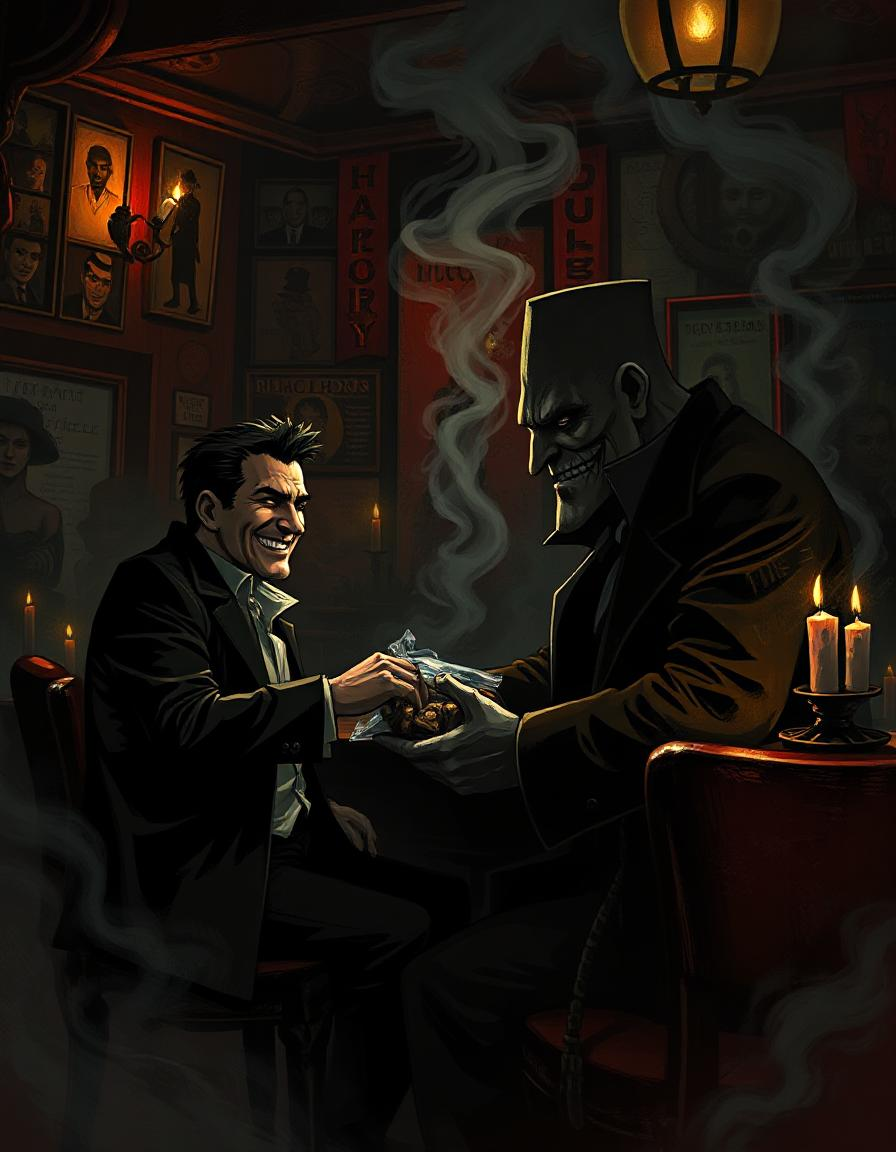

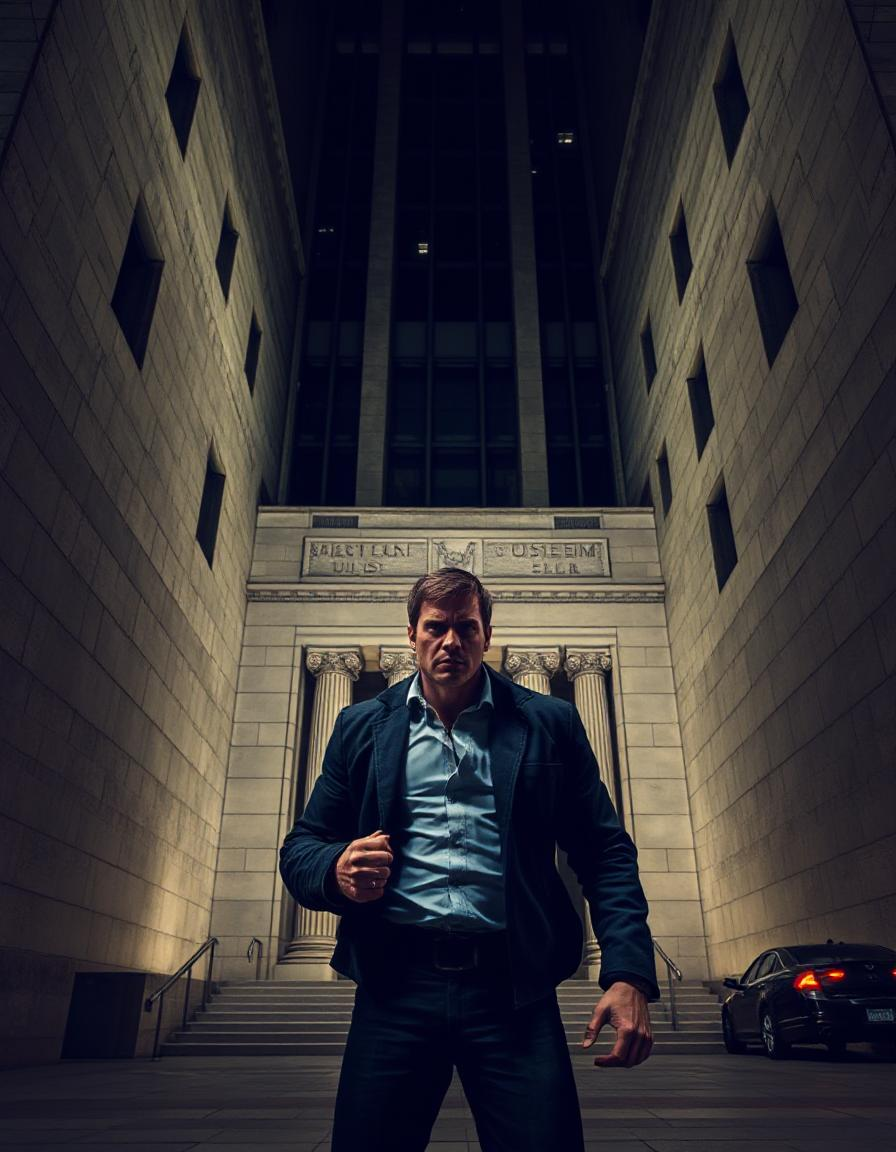

In [4]:
from time import sleep

steps = 2
for i, scene in enumerate(scenes):
	b64 = generateImage(scene, steps)
	displayB64Image(b64)
	sleep(1)